In [18]:
import zipfile
import os

zip_path = '/content/ninjacart_data.zip'
extract_path = '/content/ninjacart_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

extracted_contents = os.listdir(extract_path)
print("Extracted Files:", extracted_contents)

if "ninjacart_data" in extracted_contents:
    extract_path = os.path.join(extract_path, "ninjacart_data")

print("Final Dataset Structure:", os.listdir(extract_path))

Extracted Files: ['ninjacart_data']
Final Dataset Structure: ['train', 'test']


In [19]:
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')

In [126]:
train_dir

'/content/ninjacart_dataset/ninjacart_data/train'

In [124]:
train_dir1 = "ninjacart_dataset/ninjacart_data/train"

In [125]:
train_dir1

'ninjacart_dataset/ninjacart_data/train'

In [128]:
from collections import Counter
import cv2
import random

def get_image_paths(directory):
    image_paths = []
    class_labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a folder
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                image_paths.append(img_path)
                class_labels.append(class_name)

    return image_paths, class_labels

In [129]:
train_images, train_labels = get_image_paths(train_dir)
test_images, test_labels = get_image_paths(test_dir)

In [131]:
test_images

['/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato245.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato191.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato176.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato211.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato187.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato214.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato157.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato185.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato247.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato144.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato178.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato192.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato200.png',
 '/content/ninjacart_dataset/ninjacart_data/test/tomato/tomato20

In [132]:
print(f"Total Training Images: {len(train_images)}")
print(f"Total Testing Images: {len(test_images)}")

Total Training Images: 3135
Total Testing Images: 351


In [133]:
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

In [134]:
train_counts

Counter({'tomato': 789, 'onion': 849, 'indian market': 599, 'potato': 898})

In [135]:
test_counts

Counter({'tomato': 106, 'onion': 83, 'indian market': 81, 'potato': 81})

In [138]:
train_counts.keys()

dict_keys(['tomato', 'onion', 'indian market', 'potato'])

<ipython-input-141-7b9db56b5aba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(train_counts.keys()), y=(train_counts.values()), palette="viridis")


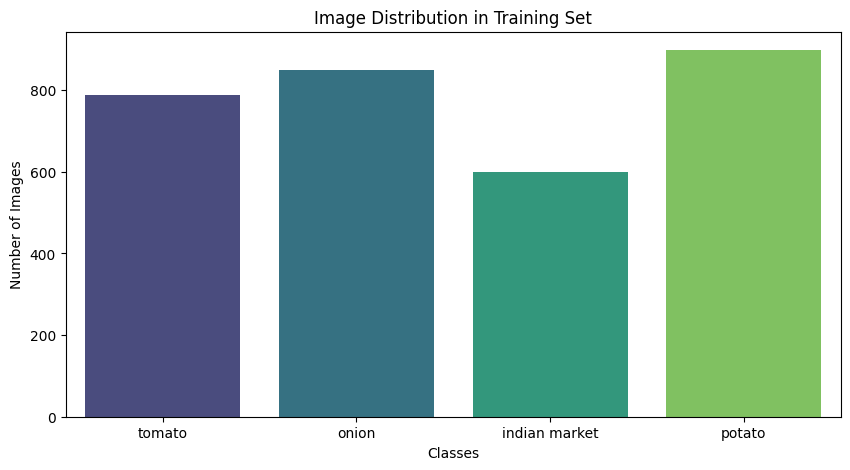

In [141]:
plt.figure(figsize = (10,5))
sns.barplot(x=(train_counts.keys()), y=(train_counts.values()), palette="viridis")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Distribution in Training Set")
plt.show()

<ipython-input-143-576906b1b7fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = test_counts.keys(), y = test_counts.values(), palette = 'coolwarm')


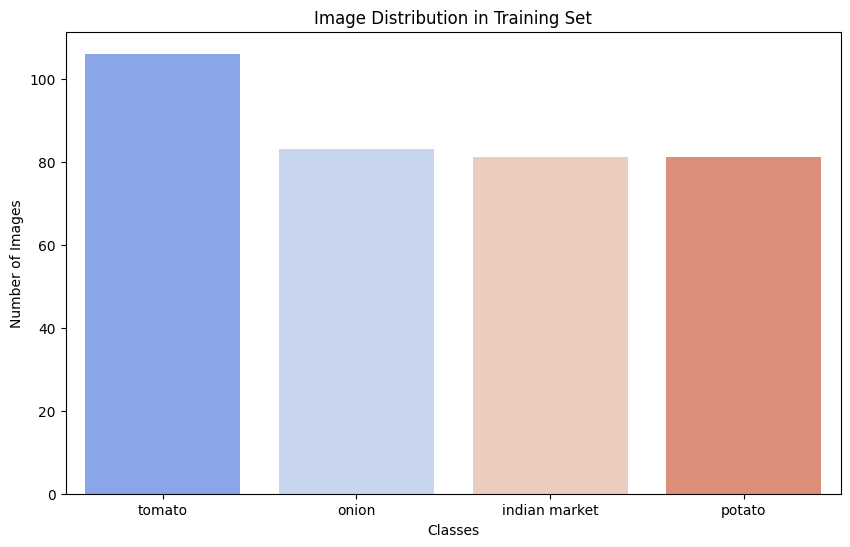

In [143]:
plt.figure(figsize = (10,6))
sns.barplot(x = test_counts.keys(), y = test_counts.values(), palette = 'coolwarm')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Distribution in Training Set")
plt.show()

In [144]:
def plot_sample_images(image_paths, labels, num_samples=5):
    unique_labels = list(set(labels))

    plt.figure(figsize=(12, 8))

    for i, label in enumerate(unique_labels):
        sample_paths = [img for img, lbl in zip(image_paths, labels) if lbl == label]
        selected_images = random.sample(sample_paths, min(num_samples, len(sample_paths)))

        for j, img_path in enumerate(selected_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis("off")
            if j == 0:
                plt.ylabel(label, fontsize=12, fontweight="bold")

    plt.suptitle("Sample Images from Each Class", fontsize=14, fontweight="bold")
    plt.show()

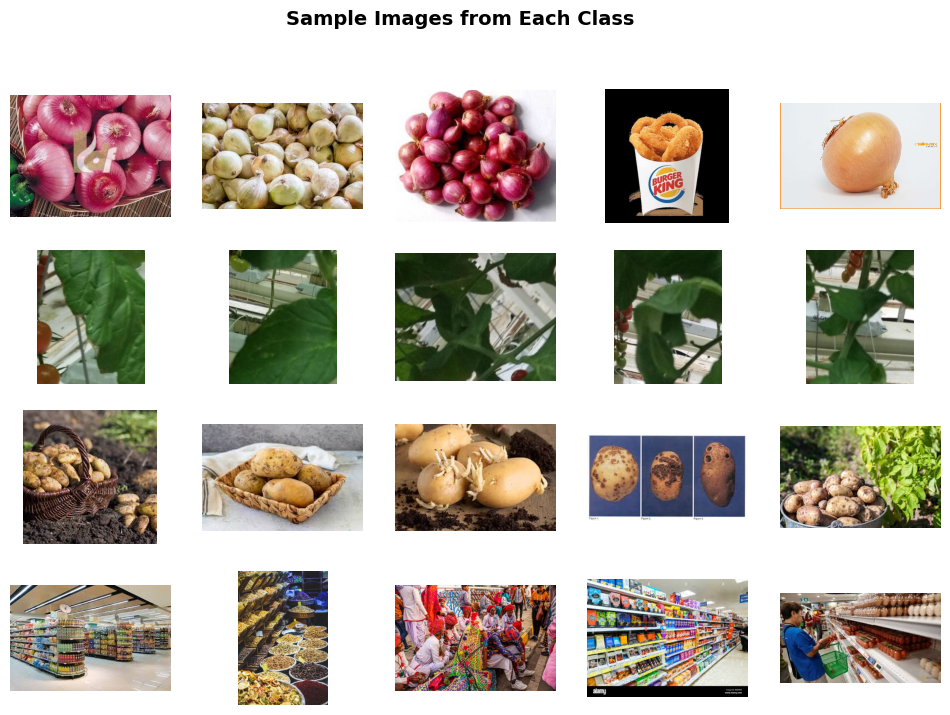

In [145]:
plot_sample_images(train_images, train_labels, num_samples=5)

In [146]:
image_shapes = [cv2.imread(img).shape for img in train_images[:100]]  # Check first 100 images
shape_counts = Counter(image_shapes)

In [147]:
for shape, count in shape_counts.items():
    print(f"Shape {shape}: {count} images")

Shape (400, 500, 3): 44 images
Shape (500, 400, 3): 56 images


In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224,224)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split = 0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [62]:
train_datagen

In [63]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(extract_path, 'train'),
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 2511 images belonging to 4 classes.


In [64]:
val_generator = train_datagen.flow_from_directory(
    os.path.join(extract_path, 'train'),
    target_size = img_size,
    batch_size = batch_size,
    class_mode= 'categorical',
    subset = 'validation'
)

Found 624 images belonging to 4 classes.


In [65]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(extract_path, 'test'),
    target_size = img_size,
    batch_size = batch_size,
    class_mode= 'categorical',
    shuffle = False
)

Found 351 images belonging to 4 classes.


In [66]:
len(train_generator)

40

In [67]:
print(f"Class Mapping: {train_generator.class_indices}")

Class Mapping: {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3}


In [68]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


base_model = ResNet50(weights = 'imagenet', include_top=False, input_shape = (224,224,3))
base_model.trainable= False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation= 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(train_generator.class_indices), activation = 'softmax')(x)

In [69]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights = 'imagenet', include_top=False, input_shape= (224,224,3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation= 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(train_generator.class_indices), activation = 'softmax')(x)

In [71]:
model = Model(inputs = base_model.input, outputs = output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [72]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only =True)
]

In [81]:
import math
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs = 20,
    batch_size = batch_size,
    callbacks=callbacks,
    steps_per_epoch = int(math.ceil(train_generator.samples)/batch_size),
    validation_steps = int(math.ceil(val_generator.samples)/batch_size),
)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6203 - loss: 0.8843

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 296s 5s/step - accuracy: 0.6240 - loss: 0.8767 - val_accuracy: 0.8958 - val_loss: 0.2700
Epoch 2/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 1:51 3s/step - accuracy: 0.9375 - loss: 0.1910

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9375 - loss: 0.1910 - val_accuracy: 0.9045 - val_loss: 0.2653
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9080 - loss: 0.2746

39/39 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.9082 - loss: 0.2740 - val_accuracy: 0.9149 - val_loss: 0.2116
Epoch 4/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 1:38 3s/step - accuracy: 0.9219 - loss: 0.3058

39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9219 - loss: 0.3058 - val_accuracy: 0.9271 - val_loss: 0.1969
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.9331 - loss: 0.1953 - val_accuracy: 0.9306 - val_loss: 0.2158
Epoch 6/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 1:39 3s/step - accuracy: 0.9531 - loss: 0.1402

39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 971ms/step - accuracy: 0.9531 - loss: 0.1402 - val_accuracy: 0.9340 - val_loss: 0.1955
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9398 - loss: 0.1529

39/39 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.9398 - loss: 0.1529 - val_accuracy: 0.9410 - val_loss: 0.1779
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9844 - loss: 0.0628 - val_accuracy: 0.9323 - val_loss: 0.1785
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9446 - loss: 0.1317

39/39 ━━━━━━━━━━━━━━━━━━━━ 179s 5s/step - accuracy: 0.9446 - loss: 0.1318 - val_accuracy: 0.9462 - val_loss: 0.1745
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 979ms/step - accuracy: 0.9062 - loss: 0.1732 - val_accuracy: 0.9358 - val_loss: 0.1828
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.9506 - loss: 0.1469 - val_accuracy: 0.9410 - val_loss: 0.1819
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 38s 942ms/step - accuracy: 0.9688 - loss: 0.0848 - val_accuracy: 0.9358 - val_loss: 0.1823
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9613 - loss: 0.1231

39/39 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.9613 - loss: 0.1229 - val_accuracy: 0.9410 - val_loss: 0.1712
Epoch 14/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 2:25 4s/step - accuracy: 0.9531 - loss: 0.0938

39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 918ms/step - accuracy: 0.9531 - loss: 0.0938 - val_accuracy: 0.9444 - val_loss: 0.1601
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9602 - loss: 0.1006

39/39 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.9602 - loss: 0.1008 - val_accuracy: 0.9549 - val_loss: 0.1270
Epoch 16/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 1:34 2s/step - accuracy: 0.9531 - loss: 0.1110

39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 969ms/step - accuracy: 0.9531 - loss: 0.1110 - val_accuracy: 0.9583 - val_loss: 0.1210
Epoch 17/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.9669 - loss: 0.0977 - val_accuracy: 0.9392 - val_loss: 0.2044
Epoch 18/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 38s 936ms/step - accuracy: 0.9688 - loss: 0.1138 - val_accuracy: 0.9497 - val_loss: 0.1599
Epoch 19/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.9683 - loss: 0.0912 - val_accuracy: 0.9531 - val_loss: 0.1973
Epoch 20/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 998ms/step - accuracy: 0.9375 - loss: 0.1536 - val_accuracy: 0.9444 - val_loss: 0.1840


In [82]:
train_generator.samples/64

39.234375

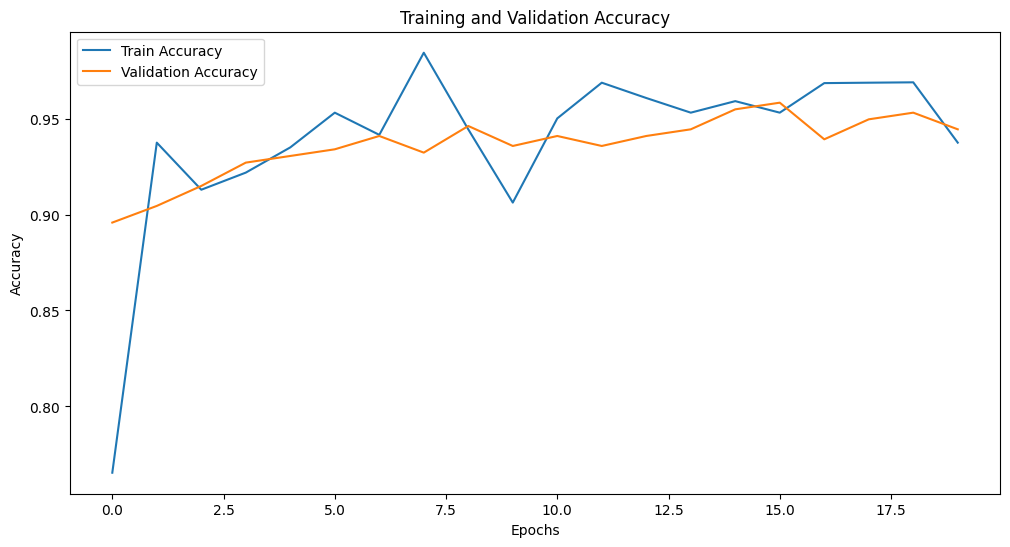

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


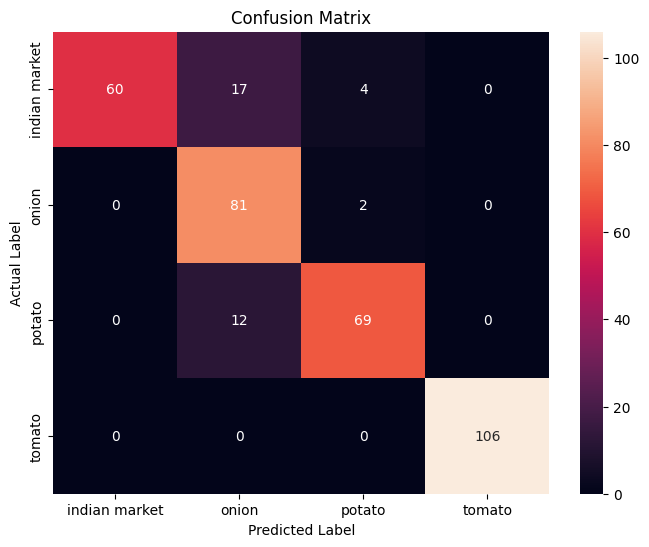

In [86]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

best_model = tf.keras.models.load_model('best_model.h5')

y_pred = np.argmax(best_model.predict(test_generator), axis = 1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = train_generator.class_indices.keys(), yticklabels =train_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [87]:
import cv2

def classify_image(image_path, model):
  img = cv2.imread(image_path)
  img = cv2.resize(img, (224,224))
  img = img/ 255.0
  img = np.expand_dims(img, axis =0)

  prediction = model.predict(img)
  class_index =np.argmax(prediction)
  class_labels =list(train_generator.class_indices.keys())

  return class_labels[class_index]

In [155]:
print(os.listdir(extract_path))

['train', 'test']


In [156]:
print(os.listdir(test_dir))

['tomato', 'onion', 'indian market', 'potato']


In [157]:
print(os.path.join(test_dir,'tomato'))

/content/ninjacart_dataset/ninjacart_data/test/tomato


In [159]:
omato1 = "/content/ninjacart_dataset/ninjacart_data/test/tomato"
print(os.listdir(tomato1))

['tomato245.png', 'tomato191.png', 'tomato176.png', 'tomato211.png', 'tomato187.png', 'tomato214.png', 'tomato157.png', 'tomato185.png', 'tomato247.png', 'tomato144.png', 'tomato178.png', 'tomato192.png', 'tomato200.png', 'tomato207.png', 'tomato186.png', 'tomato190.png', 'tomato180.png', 'tomato229.png', 'tomato193.png', 'tomato168.png', 'tomato212.png', 'tomato244.png', 'tomato177.png', 'tomato238.png', 'tomato206.png', 'tomato172.png', 'tomato208.png', 'tomato204.png', 'tomato158.png', 'tomato181.png', 'tomato232.png', 'tomato194.png', 'tomato164.png', 'tomato173.png', 'tomato156.png', 'tomato174.png', 'tomato183.png', 'tomato236.png', 'tomato243.png', 'tomato221.png', 'tomato239.png', 'tomato197.png', 'tomato147.png', 'tomato149.png', 'tomato230.png', 'tomato195.png', 'tomato234.png', 'tomato179.png', 'tomato152.png', 'tomato167.png', 'tomato163.png', 'tomato219.png', 'tomato217.png', 'tomato166.png', 'tomato196.png', 'tomato231.png', 'tomato225.png', 'tomato210.png', 'tomato202.pn

In [121]:
image_path = 'ninjacart_dataset/ninjacart_data/test/tomato/tomato245.png'
predicted_label = classify_image(image_path,best_model)
print(f"Predicted Class : {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class : tomato
